<a href="https://colab.research.google.com/github/Varsha-KML/ML-Project-Yield-Prediction/blob/main/Capstone_prjt_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# For model training and evaluation
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [ ]:
# For df training and evaluation
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Capstoneprjt2/signal-data (1).csv")
df.head()

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


In [ ]:
# Check the shape and basic info
print("Shape of dataset:", df.shape)
print("\nDataset Info:")
df.info()

Shape of dataset: (1567, 592)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 592 entries, Time to Pass/Fail
dtypes: float64(590), int64(1), object(1)
memory usage: 7.1+ MB


In [ ]:
 # Check for missing values
missing_values = df.isnull().sum()
print("\nMissing values per column:\n", missing_values[missing_values > 0])


Missing values per column:
 0       6
1       7
2      14
3      14
4      14
       ..
585     1
586     1
587     1
588     1
589     1
Length: 538, dtype: int64


In [ ]:
# Count target value distribution
print("\nTarget Value Distribution:")
print(df.iloc[:, -1].value_counts())  # Assuming target is the last column


Target Value Distribution:
Pass/Fail
-1    1463
 1     104
Name: count, dtype: int64


In [ ]:
# Select only the numeric columns for mean calculation and fillna
numeric_columns = df.select_dtypes(include=['number']).columns

# Compute the mean only on numeric columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

# # Alternatively, if you want to forward-fill (ffill) the numeric columns
# df[numeric_columns] = df[numeric_columns].fillna(method='ffill')

# # If you also want to handle non-numeric columns, fill them with 'ffill' or any other method
# non_numeric_columns = df.select_dtypes(exclude=['number']).columns
# df[non_numeric_columns] = df[non_numeric_columns].fillna(method='ffill')

# # Now, if you want to perform the division on the filled numeric columns:
# result = df[numeric_columns].fillna(method='ffill') / df[numeric_columns].fillna(df[numeric_columns].mean())

In [ ]:
df.head()

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,97.934373,0.5005,0.0118,0.0035,2.3630,0.021458,0.016475,0.005283,99.670066,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.204500,0.5019,0.0223,0.0055,4.4447,0.009600,0.020100,0.006000,208.204500,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.860200,0.4958,0.0157,0.0039,3.1745,0.058400,0.048400,0.014800,82.860200,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.843200,0.4990,0.0103,0.0025,2.0544,0.020200,0.014900,0.004400,73.843200,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,97.934373,0.4800,0.4766,0.1045,99.3032,0.020200,0.014900,0.004400,73.843200,-1


In [ ]:
missing_values = df.isnull().sum()

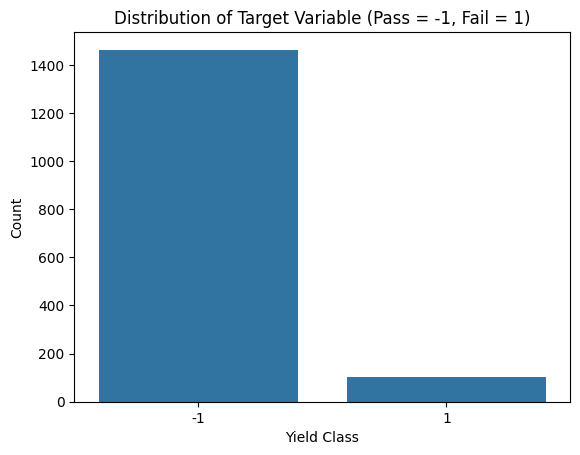

In [ ]:
# Univariate Analysis of the Target Column
sns.countplot(x='Pass/Fail', data=df)
plt.title("Distribution of Target Variable (Pass = -1, Fail = 1)")
plt.xlabel("Yield Class")
plt.ylabel("Count")
plt.show()

# Comment:
# The target variable is imbalanced — there are more passes (-1) than fails (1).
# We'll address this with SMOTE in preprocessing.

                 0            1            2            3            4
count  1561.000000  1560.000000  1553.000000  1553.000000  1553.000000
mean   3014.452896  2495.850231  2200.547318  1396.376627     4.197013
std      73.621787    80.407705    29.513152   441.691640    56.355540
min    2743.240000  2158.750000  2060.660000     0.000000     0.681500
25%    2966.260000  2452.247500  2181.044400  1081.875800     1.017700
50%    3011.490000  2499.405000  2201.066700  1285.214400     1.316800
75%    3056.650000  2538.822500  2218.055500  1591.223500     1.525700
max    3356.350000  2846.440000  2315.266700  3715.041700  1114.536600


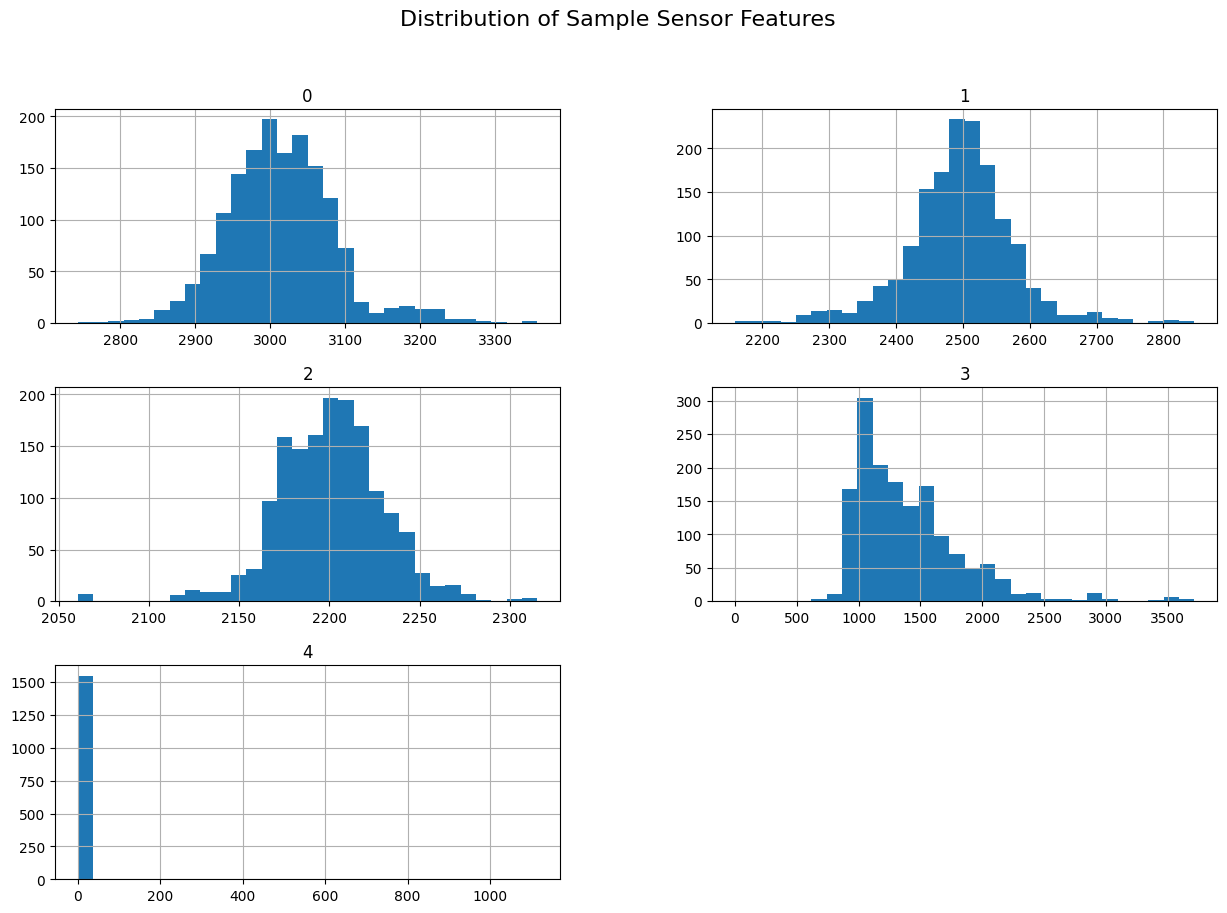

In [ ]:
# Summary statistics of features
print(df.describe().iloc[:, :5])

# Plot distribution for a few sensor features
sample_features = df.select_dtypes(include='number').columns[:5]  # Just to visualize some features
df[sample_features].hist(figsize=(15, 10), bins=30)
plt.suptitle("Distribution of Sample Sensor Features", fontsize=16)
plt.show()

# Comment:
# Some features are normally distributed, while others are skewed.
# This suggests the need for standardization before modeling.

Top 10 features most correlated with the target:
 59     0.155771
103    0.151196
510    0.131587
348    0.130108
431    0.120304
434    0.111609
430    0.109569
435    0.108573
21     0.107997
28     0.106767
Name: Pass/Fail, dtype: float64


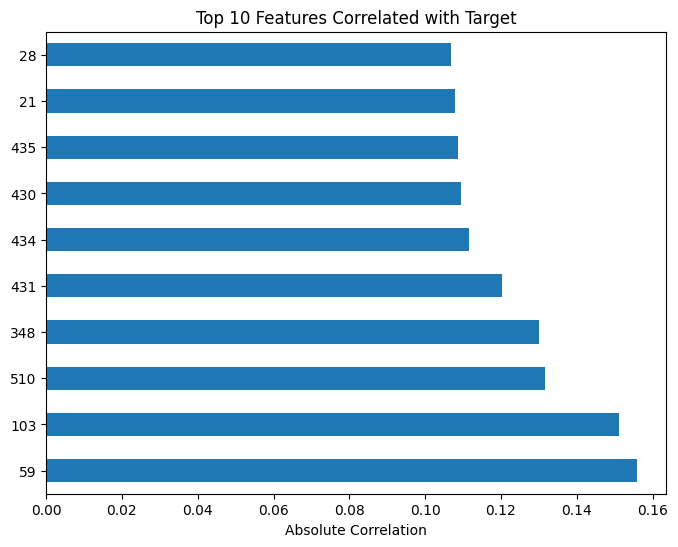

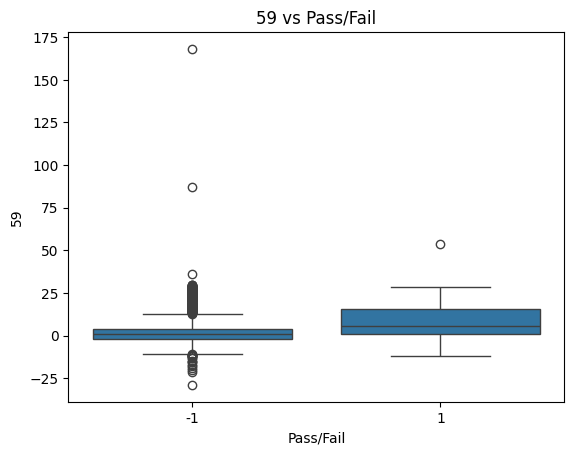

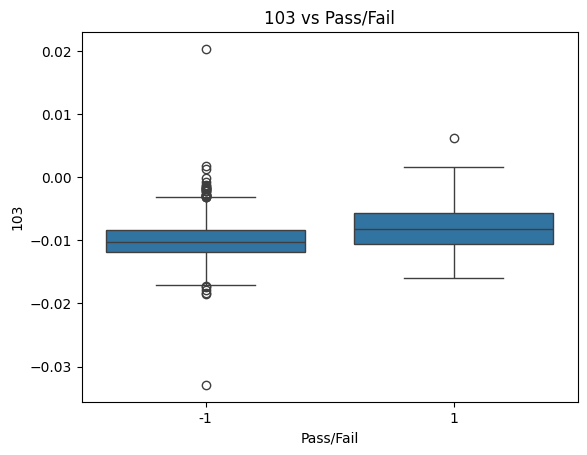

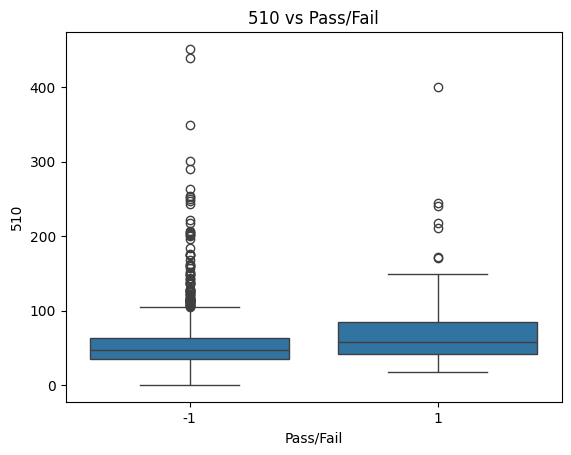

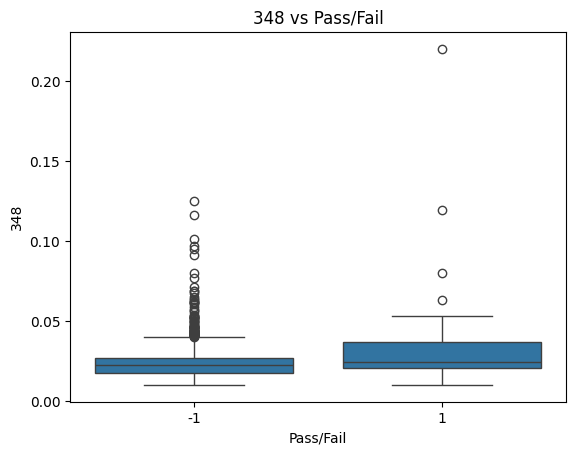

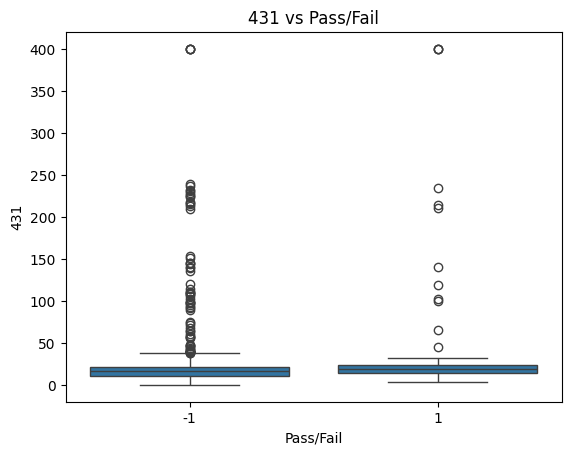

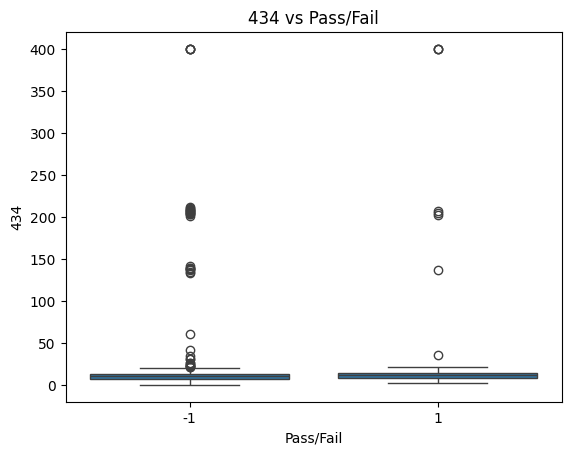

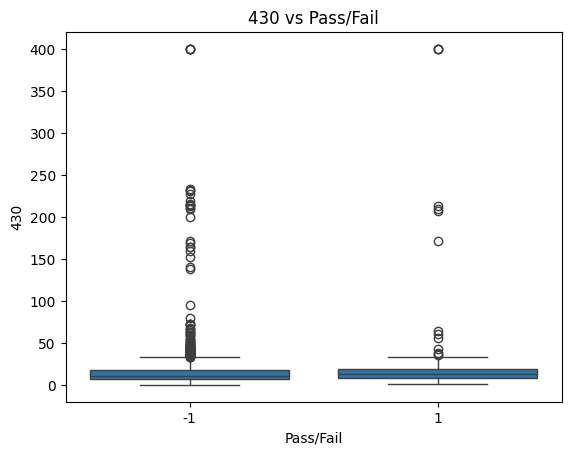

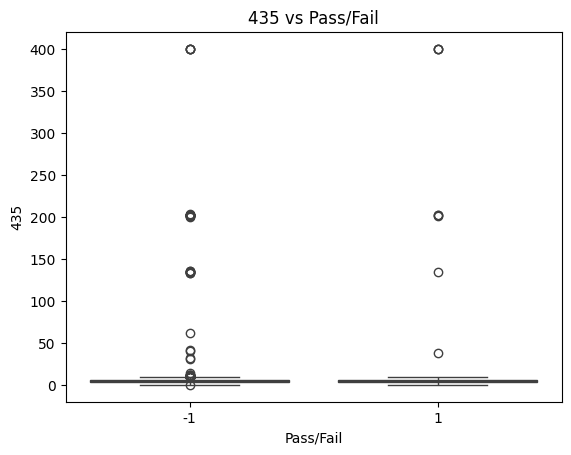

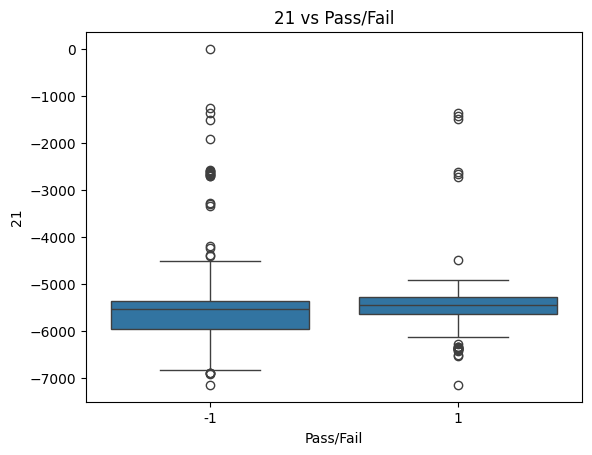

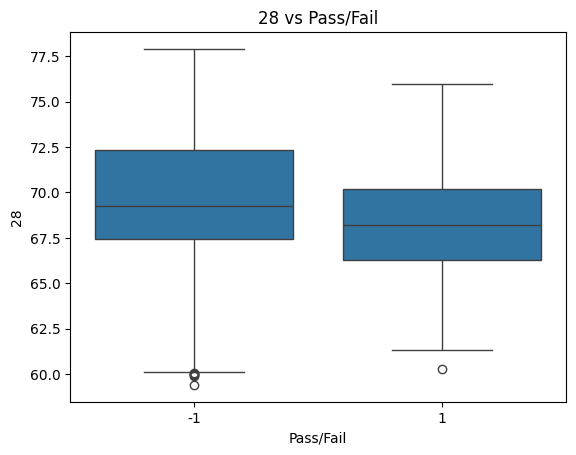

In [ ]:
# Correlation of each feature with the target
correlations = df.iloc[:,1:].corr()["Pass/Fail"].drop("Pass/Fail")
top_corr_features = correlations.abs().sort_values(ascending=False).head(10)
print("Top 10 features most correlated with the target:\n", top_corr_features)

# Bar plot of top 10 correlated features
top_corr_features.plot(kind='barh', figsize=(8,6))
plt.title("Top 10 Features Correlated with Target")
plt.xlabel("Absolute Correlation")
plt.show()

# Comment:
# A few features show moderate correlation with the target.
# These could be important in feature selection or for dimensionality reduction.

# Boxplots: Distribution of top correlated features vs Target
for feature in top_corr_features.index:
    sns.boxplot(x='Pass/Fail', y=feature, data=df)
    plt.title(f"{feature} vs Pass/Fail")
    plt.show()

# Comment:
# The boxplots show visible shifts in feature values between Pass (-1) and Fail (1) classes.
# This supports their use in classification modeling.

In [ ]:
#Seperate features and target
#The last column is the target
X = df.iloc[:, :-1]  # All columns except the last
y = df.iloc[:, -1]   # Only the last column

In [ ]:
# Check for non-numeric columns
non_numeric_cols = X.select_dtypes(exclude=[np.number]).columns
print("Non-numeric columns in X:", non_numeric_cols)

Non-numeric columns in X: Index(['Time'], dtype='object')


In [ ]:
# Drop non-numeric column 'Time'
X = X.drop(columns=['Time'])

# Double-check if only numeric columns remain
print(X.select_dtypes(exclude=[np.number]).columns)

Index([], dtype='object')


In [ ]:
#Check and fix class imbalance
from imblearn.over_sampling import SMOTE

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check new class distribution
print(y_resampled.value_counts())

Pass/Fail
-1    1463
 1    1463
Name: count, dtype: int64


In [ ]:
#Train-Test split and scaling
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#Train multiple models
#1.Rndom Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Report:
              precision    recall  f1-score   support

          -1       1.00      0.99      0.99       306
           1       0.99      1.00      0.99       280

    accuracy                           0.99       586
   macro avg       0.99      0.99      0.99       586
weighted avg       0.99      0.99      0.99       586



In [ ]:
#2.Support Vector Machine
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

print("SVM Report:")
print(classification_report(y_test, y_pred_svm))

SVM Report:
              precision    recall  f1-score   support

          -1       1.00      0.99      1.00       306
           1       0.99      1.00      0.99       280

    accuracy                           0.99       586
   macro avg       0.99      1.00      0.99       586
weighted avg       0.99      0.99      0.99       586



In [ ]:
#3.Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

print("Naive Bayes Report:")
print(classification_report(y_test, y_pred_nb))

Naive Bayes Report:
              precision    recall  f1-score   support

          -1       1.00      0.18      0.31       306
           1       0.53      1.00      0.69       280

    accuracy                           0.57       586
   macro avg       0.76      0.59      0.50       586
weighted avg       0.77      0.57      0.49       586



In [ ]:
#Hyperparameter Tunning (Random Forest)
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20, None]
}

grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best Random Forest Params:", grid.best_params_)

best_rf = grid.best_estimator_
y_pred_best = best_rf.predict(X_test)
print("Best RF Report:\n", classification_report(y_test, y_pred_best))

Best Random Forest Params: {'max_depth': None, 'n_estimators': 100}
Best RF Report:
               precision    recall  f1-score   support

          -1       1.00      0.99      0.99       306
           1       0.99      1.00      0.99       280

    accuracy                           0.99       586
   macro avg       0.99      0.99      0.99       586
weighted avg       0.99      0.99      0.99       586



In [ ]:
#Compare all models
models = {
    'Random Forest': accuracy_score(y_test, y_pred_rf),
    'SVM': accuracy_score(y_test, y_pred_svm),
    'Naive Bayes': accuracy_score(y_test, y_pred_nb)
}

print("Model Accuracy Comparison:")
for name, acc in models.items():
    print(f"{name}: {acc:.2f}")

Model Accuracy Comparison:
Random Forest: 0.99
SVM: 0.99
Naive Bayes: 0.57


In [ ]:
import joblib

# Save the best model
joblib.dump(best_rf, 'best_model.pkl')
print("Model saved successfully.")

Model saved successfully.
